"(h,k,l)",d_hkl,$2\theta$,Amplitude
"[{'hkl': (1, 1, 1), 'multiplicity': 2}]",7.713316195035402,11.472195009524798,21.75154695974218
"[{'hkl': (2, 2, 2), 'multiplicity': 2}]",3.856658097517701,23.061435697421935,21.0209016536401
"[{'hkl': (1, 1, 0), 'multiplicity': 6}]",3.4909801380924574,25.515805855824574,42.506397903907136


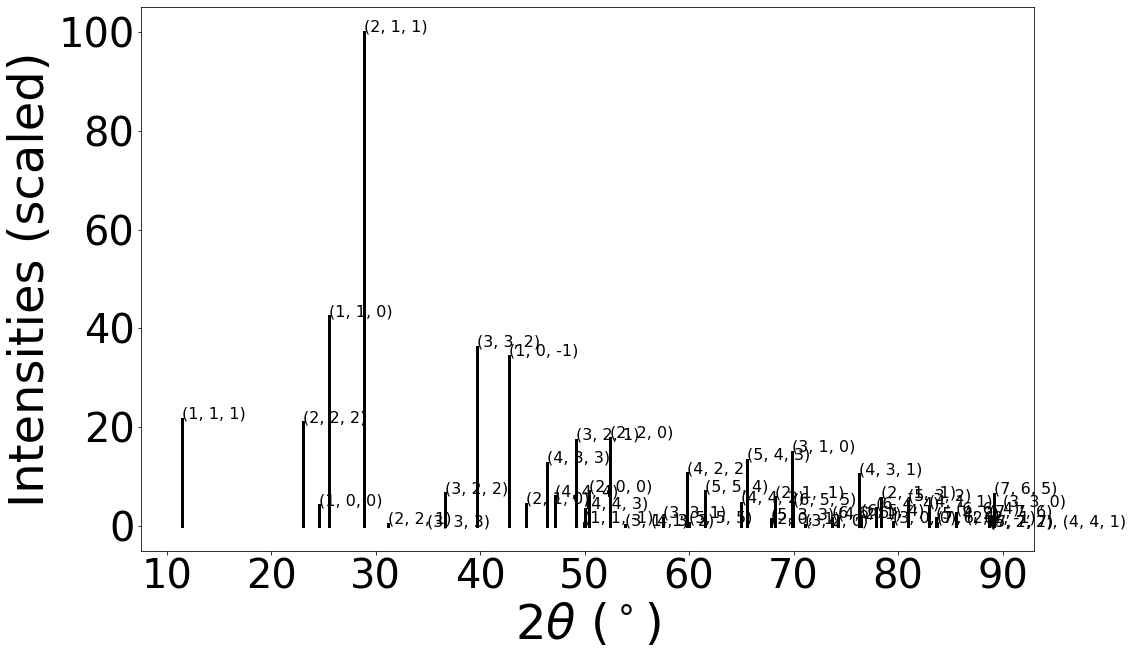

In [8]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display
import tabulate
with MPRester("a6NTgQUJ1bGqoLFH") as m:
    structur = m.get_structure_by_material_id("mp-9363")
    w = CifWriter(structur)
    w.write_file('mp9363.cif')
    
    #Création de l'objet calculateur XRD
    
    xrdcalcu = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)
    
    #On prend les données de l'objet calculator
    
    xrdcalc = xrdcalcu.get_pattern(structure = structur, scaled=True, two_theta_range=(0, 90))
    xrdcalcu.get_plot(structur)
    #Mise en tableau des résultats pour une meilleur vision
    
    table = [["(h,k,l)","d_hkl",r'$2\theta$',"Amplitude"],[(xrdcalc.hkls)[0],(xrdcalc.d_hkls)[0],(xrdcalc.x)[0],(xrdcalc.y)[0]],[(xrdcalc.hkls)[1],(xrdcalc.d_hkls)[1],(xrdcalc.x)[1],(xrdcalc.y)[1]],[(xrdcalc.hkls)[3],(xrdcalc.d_hkls)[3],(xrdcalc.x)[3],(xrdcalc.y)[3]]]
    display(HTML(tabulate.tabulate(table, tablefmt='html')))

Diffractogramme du RbNdS2 obtenu pour des rayons x de longueur d'onde 1.54060 Angstrom
Les valeurs obtenues sont similaires à celles de Materials Project. La seule chose qui change ce sont les indices (h,k,l). Sûrement est-ce dû au fait que sur material project, il s'agit des indices correspondant à la maille conventionnelle et que nous avons utilisé la maille primitive. 


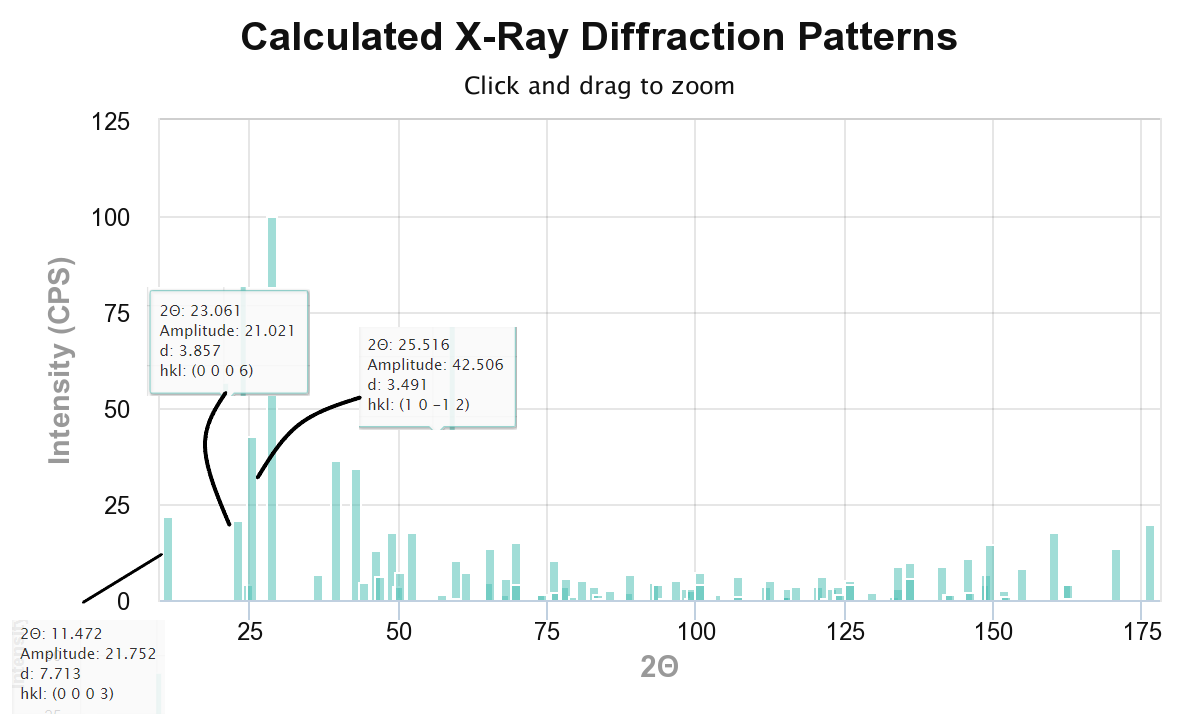

In [6]:
from IPython.display import Image
print("Diffractogramme du RbNdS2 obtenu pour des rayons x de longueur d'onde 1.54060 Angstrom")
print("Les valeurs obtenues sont similaires à celles de Materials Project. La seule chose qui change ce sont les indices (h,k,l). Sûrement est-ce dû au fait que sur material project, il s'agit des indices correspondant à la maille conventionnelle et que nous avons utilisé la maille primitive. ")
Image(filename='xray.png')

Pour ma structure, qui est rhomboédrique, il peut être intéressant d'utiliser le système de Bravais-Miller. Celui-ci utilise 4 indices (h k i l) avec :
h k l = les indices de Miller
i = un indice redondant
 
En changeant le terme symprec on obtient ces 4 indices.


"(h,k,l)",d_hkl,$2\theta$,Amplitude
"[{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]",7.713316195035401,11.4721950095248,21.751546961371528
"[{'hkl': (0, 0, 0, 6), 'multiplicity': 2}]",3.8566580975177005,23.06143569742194,21.020901655214708
"[{'hkl': (1, 0, -1, 2), 'multiplicity': 12}]",3.490980136899648,25.515805864689902,42.50639790349145


On retrouve désormais exactement ce que Materials Project nous propose.


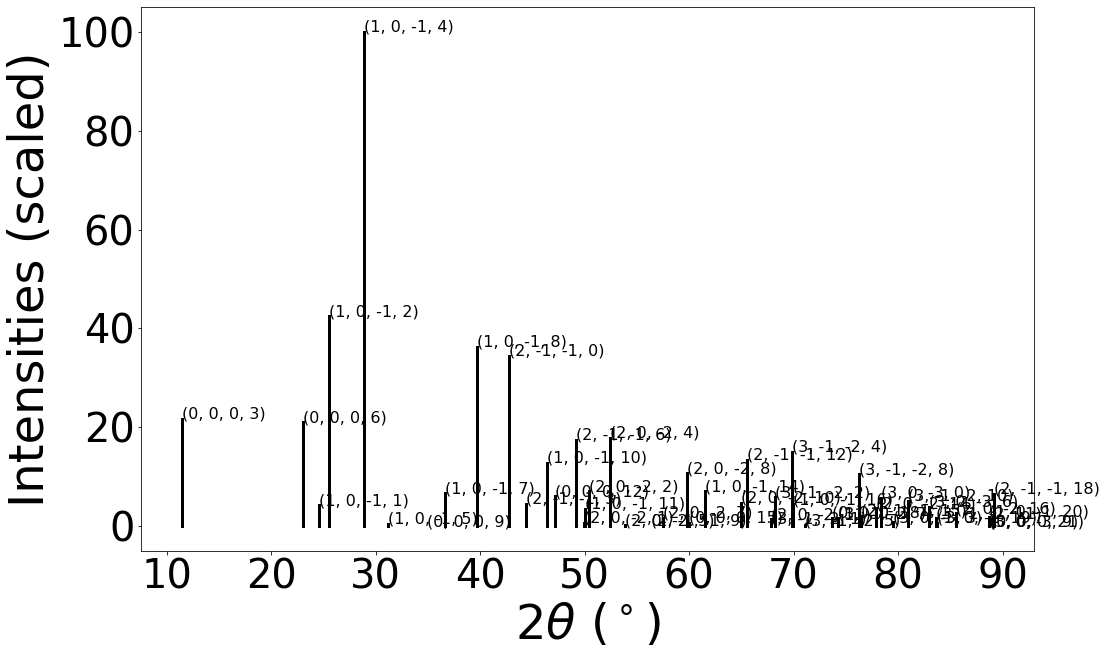

In [4]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display
import tabulate
with MPRester("a6NTgQUJ1bGqoLFH") as m:
    structur = m.get_structure_by_material_id("mp-9363")
    w = CifWriter(structur)
    w.write_file('mp9363.cif')  
    print("Pour ma structure, qui est rhomboédrique, il peut être intéressant d'utiliser le système de Bravais-Miller. Celui-ci utilise 4 indices (h k l i) avec :")
    print("h k l = les indices de Miller")
    print("i = un indice redondant")
    print(" ")
    print("En changeant le terme symprec on obtient bien ces 4 indices.")
    xrdcalcu = XRDCalculator(wavelength='CuKa', symprec=0.9, debye_waller_factors=None)
    
    #On prend les données de l'objet calculator
    
    xrdcalc = xrdcalcu.get_pattern(structure = structur, scaled=True, two_theta_range=(0, 90))
    
    #Mise en tableau des résultats pour une meilleur vision
    
    table = [["(h,k,l)","d_hkl",r'$2\theta$',"Amplitude"],[(xrdcalc.hkls)[0],(xrdcalc.d_hkls)[0],(xrdcalc.x)[0],(xrdcalc.y)[0]],[(xrdcalc.hkls)[1],(xrdcalc.d_hkls)[1],(xrdcalc.x)[1],(xrdcalc.y)[1]],[(xrdcalc.hkls)[3],(xrdcalc.d_hkls)[3],(xrdcalc.x)[3],(xrdcalc.y)[3]]]
    display(HTML(tabulate.tabulate(table, tablefmt='html')))
    xrdcalcu.get_plot(structur)
    print("On retrouve désormais exactement ce que Materials Project nous propose.")